In [1]:
from scipy.stats import multivariate_normal
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

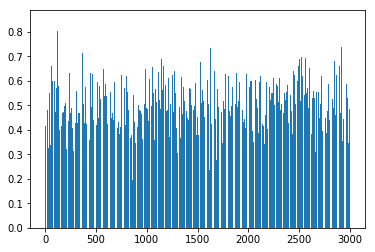

In [2]:
# Generate non-uniform distribution
mu = 0.5
cov = 0.1
M = 3000   # no. of samples
N = 200    # sample size (size of each bin)
distribution = np.random.normal(loc=mu, scale=cov, size=M)
plt.bar([i for i in range(M)], distribution)
plt.show()

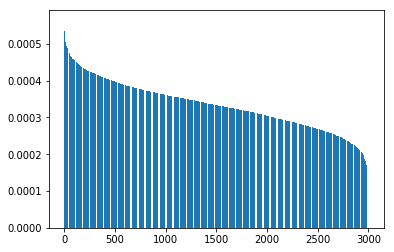

In [3]:
# Sort the distribution in reverse order of probabilities
distribution = distribution / sum(distribution)     # Normalize the distribution (sum of probabilities add to 1)
sorted_distribution_indices = np.argsort(distribution)[::-1]
sorted_distribution = np.sort(distribution)[::-1]   # Sort distribution in reverse order
plt.bar([i for i in range(M)], sorted_distribution)
plt.show()

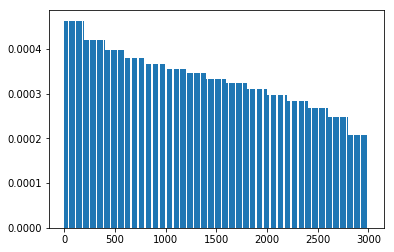

In [4]:
# Divide the data into bins
bins = {}
bins_indices = {}
for i in range(0, M, N):
    bins[int(i/N)] = sorted_distribution[i:i+N]
    bins_indices[int(i/N)] = sorted_distribution_indices[i:i+N]

# Calculate the mean probability of each bin
bins_prob = {}
for key, value in bins.items():
    bins_prob[key] = sum(value) / len(value)

# Plot its distribution
bins_distribution = np.zeros((M))
k = 0
for i in range(len(bins_prob)):
    for j in range(N):
        bins_distribution[k] = bins_prob[i]
        k+=1
        
plt.bar([i for i in range(M)], bins_distribution)        
plt.show()

In [5]:
# Get the probability distribution of the mean probabilities for every bin (by normalizing)
p = []
for prob in list(bins_prob.values()):
    p.append(prob/sum(bins_prob.values()))
    
# Select bins randomly with replacement
selected_bins = []
for i in range(N):
    selected_bins.append(np.random.choice(list(bins_prob.keys()), p=p, replace=True))
selected_bins = Counter(selected_bins)
print(selected_bins)

Counter({2: 19, 3: 19, 4: 18, 6: 17, 1: 17, 7: 17, 0: 14, 14: 14, 11: 13, 8: 13, 9: 10, 13: 9, 5: 8, 12: 8, 10: 4})


In [6]:
# Select indices from every bin corresponding to selected_bins
selected_indices = []
for key, value in selected_bins.items():
    selected_indices.append(np.random.choice(list(bins_indices[key]), size=value, replace=False))
selected_indices = [item for sublist in selected_indices for item in sublist]
print(selected_indices)

[2029, 2897, 165, 1974, 2368, 755, 418, 2759, 2034, 48, 308, 227, 1084, 1059, 1952, 2004, 2417, 537, 1160, 867, 330, 826, 154, 1688, 749, 1788, 49, 2617, 2585, 1502, 2107, 680, 1551, 1373, 2810, 1464, 2901, 2802, 758, 2549, 2069, 811, 2983, 1336, 1283, 1773, 1163, 2493, 688, 367, 2675, 870, 152, 1726, 2658, 243, 1182, 2015, 1768, 484, 637, 1898, 2028, 1881, 2955, 648, 2067, 444, 905, 1980, 2241, 231, 2538, 945, 1538, 228, 611, 581, 791, 742, 1758, 772, 2588, 258, 966, 21, 1085, 1754, 2923, 234, 1943, 525, 1666, 1480, 2045, 2163, 2469, 2276, 1976, 1572, 776, 638, 2485, 1883, 2212, 1208, 1889, 1797, 1366, 1409, 1187, 2289, 331, 1734, 1913, 851, 1387, 860, 201, 2690, 2899, 1821, 2268, 359, 1314, 2374, 906, 2621, 635, 2811, 1636, 194, 808, 2949, 766, 783, 893, 2763, 403, 2492, 1078, 2954, 271, 2158, 1611, 2649, 1203, 1421, 707, 940, 1334, 1942, 1362, 1561, 2403, 2365, 2576, 1023, 2561, 821, 191, 2120, 2556, 316, 1254, 2311, 1013, 730, 650, 2780, 1995, 1568, 2715, 1454, 659, 858, 794, 1356,

In [7]:
selected_indices_prob = []
selected_indices_bin_prob = []
for i in range(M):
    if sorted_distribution_indices[i] in selected_indices:
        selected_indices_prob.append(sorted_distribution[i])
    else:
        selected_indices_prob.append(0.0)
    if sorted_distribution_indices[i] in selected_indices:
        for key, value in bins_indices.items():
            if sorted_distribution_indices[i] in value.tolist():
                selected_indices_bin_prob.append(bins_prob[key])
    else:
        selected_indices_bin_prob.append(0.0)

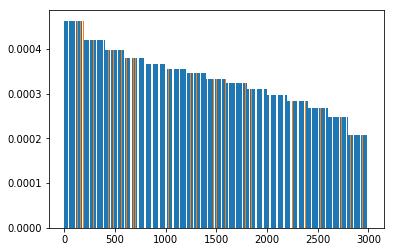

In [8]:
plt.bar([i for i in range(M)], bins_distribution)
plt.bar([i for i in range(M)], selected_indices_bin_prob)
plt.show()

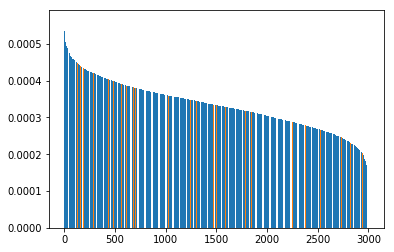

In [9]:
plt.bar([i for i in range(M)], sorted_distribution)
plt.bar([i for i in range(M)], selected_indices_prob)
plt.show()

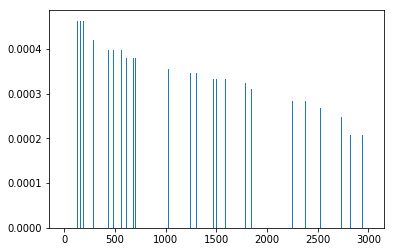

In [ ]:
plt.bar([i for i in range(M)], selected_indices_bin_prob)
plt.show()

In [ ]:
plt.bar([i for i in range(M)], selected_indices_prob)
plt.show()